In [7]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
import os

file_name = "../data/general_cancer_dataset.csv"

if not os.path.exists(file_name):
    raise FileNotFoundError("File not found.Please check")


df = pd.read_csv(file_name)

def stage_to_label(row):
    if row["Cancer_Stage_Stage I"] == 1:
        return 0
    elif row["Cancer_Stage_Stage II"] == 1:
        return 1
    elif row["Cancer_Stage_Stage III"] == 1:
        return 2
    elif row["Cancer_Stage_Stage IV"] == 1:
        return 3
    else:
        return -1 

df["target"] = df.apply(stage_to_label,axis=1)

X = df.drop(columns=["Cancer_Stage_Stage I", "Cancer_Stage_Stage II", 
                     "Cancer_Stage_Stage III", "Cancer_Stage_Stage IV","Target_Advanced_Cancer", "target"])

y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler_file = "../models/cancer_scaler.pkl"

if os.path.exists(scaler_file):
    raise FileExistsError("File already exist.")
else:
    joblib.dump(scaler,scaler_file)

pd.DataFrame(X)

,Age,Tumor_Size_cm,Has_Metastasis,Family_History,Sex_Female,Sex_Male,Cancer_Type_Carcinoma,Cancer_Type_Leukemia,Cancer_Type_Lymphoma,Cancer_Type_Sarcoma,Smoking_Habit_Current,Smoking_Habit_Former,Smoking_Habit_Never,Alcohol_Consumption_High,Alcohol_Consumption_Moderate,Alcohol_Consumption_None
0,71,6.11,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,34,3.34,0,1,0,1,0,1,0,0,0,0,1,0,0,1
2,80,3.01,0,1,0,1,0,1,0,0,1,0,0,0,0,1
3,40,6.54,0,0,0,1,0,1,0,0,0,0,1,1,0,0
4,43,6.71,1,0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,4.36,0,1,1,0,0,1,0,0,0,0,1,0,0,1
4996,45,7.00,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4997,54,5.47,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4998,48,6.29,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model = KNeighborsClassifier(10)
model.fit(X_train,y_train)

file_name_pkl = "../models/cancer_model.pkl"

if os.path.exists(file_name_pkl):
    raise FileExistsError("File already exist")
else:
    joblib.dump(model,file_name_pkl)
    print("File created succesffully")

File created succesffully


In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
classification = classification_report(y_test,pred)

print("accuracy",accuracy)
print("classification",classification)


accuracy 0.493
classification               precision    recall  f1-score   support

           0       0.46      0.63      0.53       310
           1       0.47      0.37      0.41       319
           2       0.61      0.70      0.65       237
           3       0.25      0.10      0.15       134

    accuracy                           0.49      1000
   macro avg       0.45      0.45      0.44      1000
weighted avg       0.47      0.49      0.47      1000



Confusion Matrix:
 [[195 115   0   0]
 [202 117   0   0]
 [ 15  13 167  42]
 [ 11   3 106  14]]


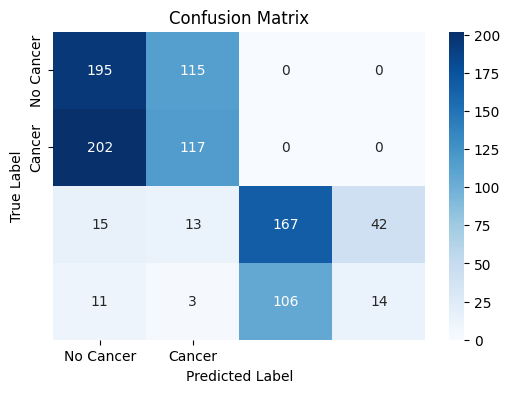

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 

cm = confusion_matrix(y_test,pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

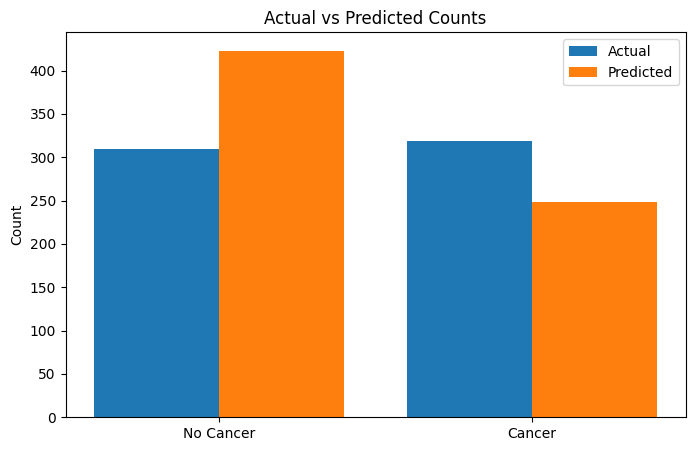

In [25]:
from collections import Counter
import numpy as np

count_pred = Counter(pred)
count_actual = Counter(y_test)

labels = ["No Cancer", "Cancer"]
x = np.arange(len(labels))

actual = [count_actual[0], count_actual[1]]
pred = [count_pred[0], count_pred[1]]

plt.figure(figsize=(8,5))
plt.bar(x - 0.2, actual, width=0.4, label='Actual')
plt.bar(x + 0.2, pred, width=0.4, label='Predicted')
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("Actual vs Predicted Counts")
plt.legend()
plt.show()